# First NN training and test 

##### use a keras implemention of the neural network 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [12]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\Semester_project\\data_test.csv'

In [13]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')

In [25]:
def data_split(data, ratio_train=0.8):
    num_observation = np.shape(data)[0]
    size_train = int(num_observation*ratio_train)
    random_permuted_indices = np.random.permutation(num_observation)
    data_suffle = data[random_permuted_indices]
    X_train = data_suffle[:size_train,:-1]
    X_test = data_suffle[size_train:,:-1]
    Y_train = np.reshape(data_suffle[:size_train,-1],(size_train,1))
    Y_test = np.reshape(data_suffle[size_train:,-1],(num_observation-size_train,1))
    return X_train , X_test , Y_train , Y_test

In [26]:
X_train, X_test, Y_train, Y_test = data_split(data)

In [27]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))


 the size of X_train is  (9832, 10)
 the size of X_test is  (2458, 10)
 the size of Y_train is  (9832, 1)
 the size of Y_test is  (2458, 1)


In [28]:
def model_training(model,X_train,X_test,Y_train,Y_test, patience_ = 50 , plot=True ):
    """Train the different models and return the MSE values"""
    early_stop = EarlyStopping(monitor ="val_loss", patience = patience_ , verbose = 1)
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=2000 ,callbacks=[early_stop] , verbose=0)
    train_mse = model.evaluate(X_train, Y_train, verbose=0)
    test_mse = model.evaluate(X_test, Y_test, verbose=0)
    print('MSE Train: %.3f | MSE Test: %.3f' % (train_mse, test_mse))
    if plot :
        # plot loss during training
        plt.title('Loss / Mean Squared Error')
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    return train_mse,test_mse

In [32]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(10,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [33]:
model_base = build_model_base_line()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


Epoch 00064: early stopping
MSE Train: 2.331 | MSE Test: 2.288


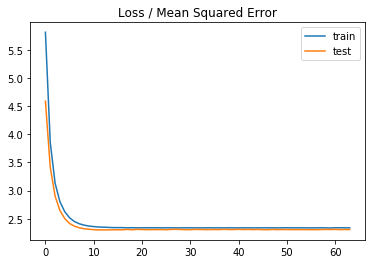

(2.3307775289087007, 2.2875357960374303)

In [34]:
patience_ = 50
model_training(model_base,X_train, X_test , Y_train, Y_test, patience_ )

In [47]:
def build_model_1(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(24 ,input_shape=(10,)))
    model.add(Dense(24))
    model.add(Dense(24))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 24)                264       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00168: early stopping
MSE Train: 2.330 | MSE Test: 2.285


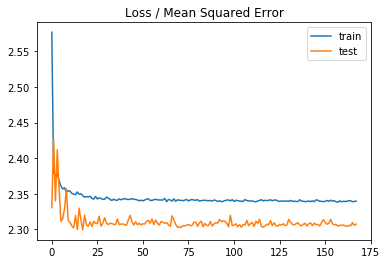

(2.330344877755186, 2.2850704292052155)

In [48]:
model_1 = build_model_1()
patience_ = 150
model_training(model_1,X_train, X_test , Y_train, Y_test, patience_ )

In [49]:
def build_model_2(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'sigmoid'))
    model.add(Dense(12,activation = 'sigmoid'))
    model.add(Dense(12,activation = 'sigmoid'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_22 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00933: early stopping
MSE Train: 1.466 | MSE Test: 1.512


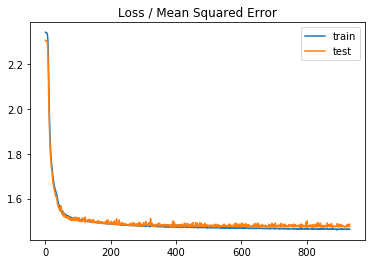

(1.466445870279199, 1.5120770882745407)

In [50]:
model_2 = build_model_2()
patience_ = 150
model_training(model_2,X_train, X_test , Y_train, Y_test, patience_ )

In [100]:
def angle_visualization(model , X_test ,Y_test, nbr_of_plot = 10):
    x = np.linspace(-1,1,1001)
    Y_hat =  model.predict(X_test, verbose=0)
    coeff_true = np.tan(Y_test)
    coeff_hat = np.tan(Y_hat)
    pts = np.array([[-1,-1],[-1,1],[1,-1]])
    for i in range(nbr_of_plot):
        plt.figure()
        triangle = plt.Polygon(pts,fill=False)
        plt.gca().add_patch(triangle)
        plt.arrow(-0.5,0,np.cos(Y_test[i,0]),np.sin(Y_test[i,0]),head_width=0.05, head_length=0.1,color='r', label =' true ')
        plt.arrow(-0.5,0,np.cos(Y_hat[i,0]),np.sin(Y_hat[i,0]),head_width=0.05, head_length=0.1,color='b', label = 'prediction')
        plt.xlim(-1.5,1.7)
        plt.ylim(-1.5,1.5)
        plt.title(" Angle visualization red is true ")
        plt.show()

    
    

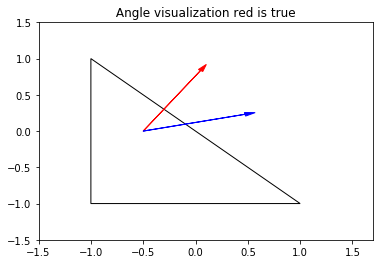

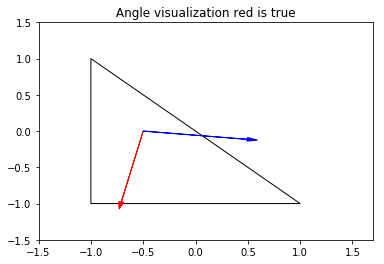

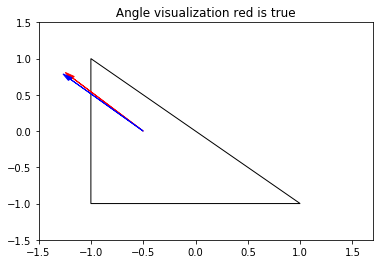

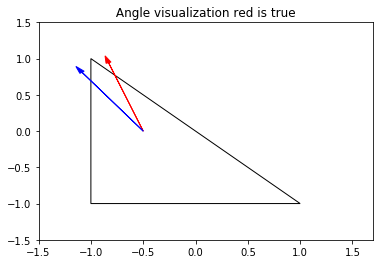

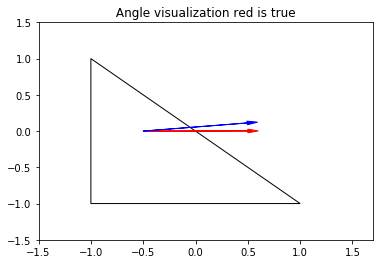

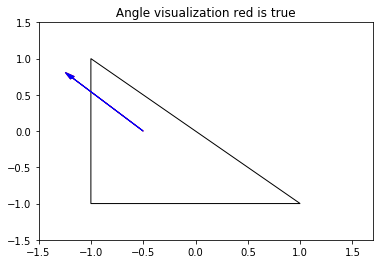

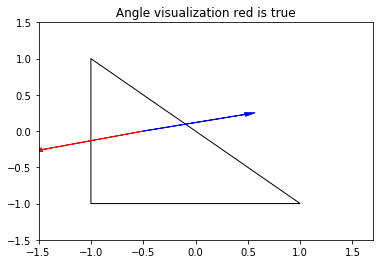

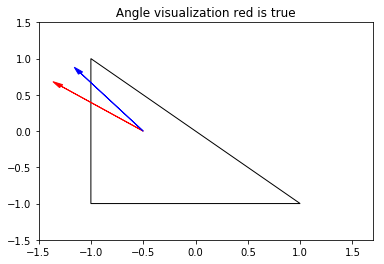

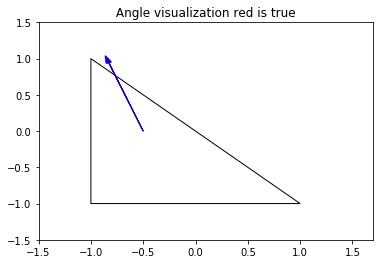

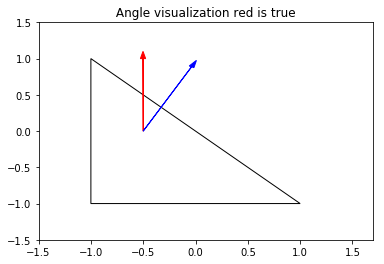

In [101]:
angle_visualization(model_2 , X_test , Y_test)